## Imports

In [1]:
import sys
sys.path.append('../')
import os
import numpy as np
from datasets.nsd import NaturalScenesDataset
import numpy as np
import matplotlib.pyplot as plt
from utils.image_search import build_inverted_index
from utils.nsd_utils import plot_interactive_surface
import json
import pandas as pd

/home/diego/miniconda3/envs/braindive/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


### Global variables

In [2]:
subject = 1
partition = 'train'
data_root = '../data/NSD/'
hemisphere = 'right'

roi = 'floc-words'

center_voxel = 56588
n_neighbor_voxels = 1000

dataset = NaturalScenesDataset(
    root=data_root, 
    subject=subject, 
    partition=partition, 
    roi=roi, 
    # center_voxel=center_voxel,
    # n_neighbor_voxels=n_neighbor_voxels,
    hemisphere=hemisphere
)

## Visualize an image

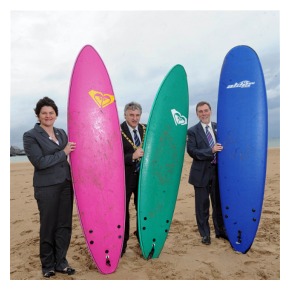

In [84]:
# Load image from dataset
idx = 6430 # or randomize through np.random.randint(len(dataset))
img, _, _ = dataset[idx]

# Plot image
f = plt.figure(figsize=(3, 3))
plt.imshow(img.permute(1, 2, 0))
plt.axis('off')
plt.tight_layout()
plt.show()

## Search images that match a word

Found 2069 images with the queried noun.


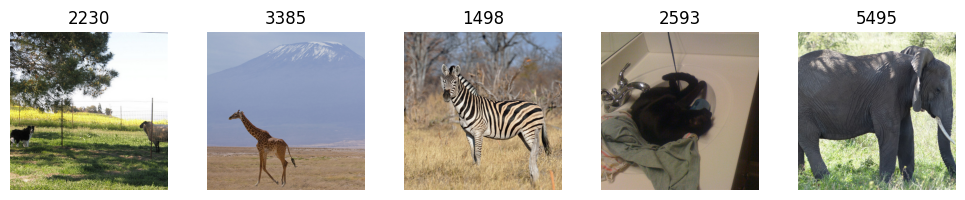

In [11]:
# Load inverted index
f = os.path.join(data_root, f'subj{subject:02d}/inverted_index_{partition.replace("debug_", "")}.json')
if not os.path.exists(f):
    build_inverted_index(data_root, subject)
index = json.load(open(f, 'r'))

# Search 5 images with the queried noun
query = 'animal'
indices = index[query]
print(f'Found {len(indices)} images with the queried noun.')
indices = np.random.choice(indices, 5)
f, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    img, _, _ = dataset[indices[i]]
    axes[i].imshow(img.permute(1, 2, 0))
    axes[i].axis('off')
    axes[i].set_title(indices[i])
plt.tight_layout()
plt.show()

## Visualize fMRI activations

In [ ]:
img_idx = 0

plot_interactive_surface(
    fmri=dataset.fmri_data[img_idx],
    roi_indices=dataset.roi_indices,
    fs_indices=dataset.fs_indices,
    fs_coords=dataset.fs_coords,
    inverted_index_roi=pd.read_csv(os.path.join(data_root, f"subj{subject:02d}", f"inverted_index_roi_{hemisphere}.csv")),
    min_x=(40 if hemisphere == 'left' else -175),
    max_x=(175 if hemisphere == 'left' else -40),
    min_y=-200,
    max_y=200
)